### Importing libraraies

In [52]:
import os
import datetime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

tf.keras.backend.clear_session()

### Loading Dataset

#### Lower Back Pain Symptoms Dataset

Source: https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset

In [2]:
spine_data = pd.read_csv('datasets/Dataset_spine.csv', 
                         skiprows=1,
                         names=['pelvic_incidence',
                                'pelvic tilt',
                                'lumbar_lordosis_angle',
                                'sacral_slope',
                                'pelvic_radius',
                                'degree_spondylolisthesis',
                                'pelvic_slope',
                                'direct_tilt',
                                'thoracic_slope',
                                'cervical_tilt',
                                'sacrum_angle',
                                'scoliosis_slope',
                                'class_att'])

spine_data = spine_data.sample(frac=1).reset_index(drop=True)

In [3]:
spine_data.head().T

,0,1,2,3,4
pelvic_incidence,43.2032,65.6653,89.8347,41.3525,61.4466
pelvic tilt,19.6631,10.5407,22.6392,16.5774,22.695
lumbar_lordosis_angle,35,56.4891,90.5635,30.7062,46.1703
sacral_slope,23.54,55.1247,67.1955,24.7751,38.7516
pelvic_radius,124.846,109.163,100.501,113.267,125.671
degree_spondylolisthesis,-2.91908,53.932,3.04097,-4.49796,-2.70788
pelvic_slope,0.0167471,0.184438,0.379933,0.98225,0.0810704
direct_tilt,26.8235,20.2044,9.4868,29.2557,16.2059
thoracic_slope,16.2905,11.528,17.7556,16.7065,13.5565
cervical_tilt,14.7613,16.4112,10.9819,16.3875,8.89572


In [4]:
spine_data.shape

(310, 13)

In [5]:
spine_data.columns

Index(['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'class_att'],
      dtype='object')

In [6]:
spine_data['class_att'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [7]:
spine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


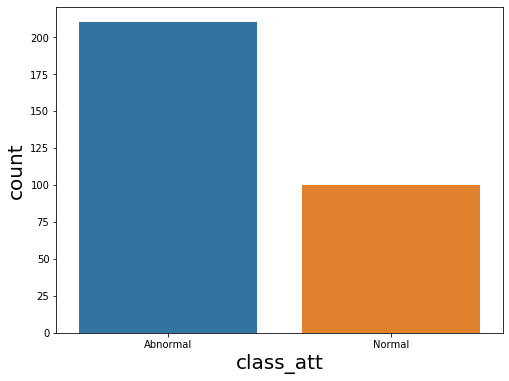

In [8]:
plt.figure(figsize=(8, 6))

sns.countplot('class_att', data = spine_data)

plt.xlabel('class_att', fontsize = 20)
plt.ylabel('count', fontsize = 20)

plt.show()

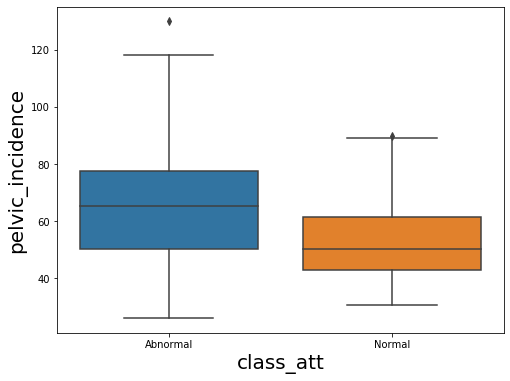

In [9]:
plt.figure(figsize=(8, 6))

sns.boxplot('class_att', 'pelvic_incidence', data = spine_data)

plt.xlabel('class_att', fontsize = 20)
plt.ylabel('pelvic_incidence', fontsize = 20)

plt.show()

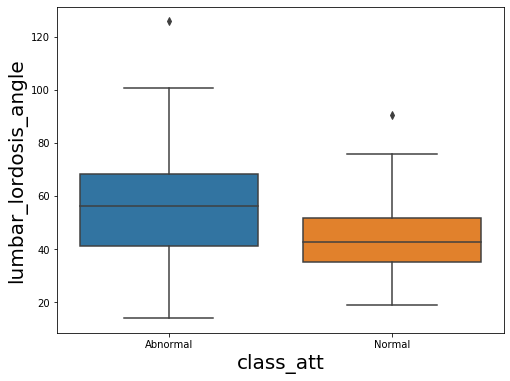

In [10]:
plt.figure(figsize=(8, 6))

sns.boxplot('class_att', 'lumbar_lordosis_angle', data = spine_data)

plt.xlabel('class_att', fontsize = 20)
plt.ylabel('lumbar_lordosis_angle', fontsize = 20)

plt.show()

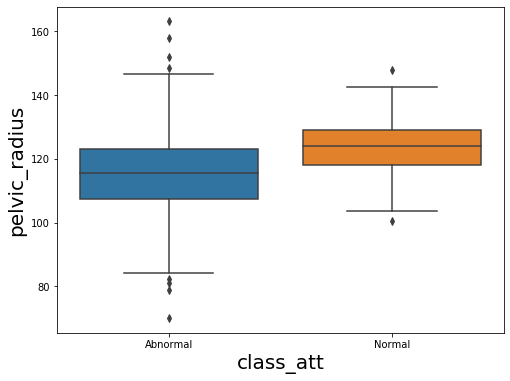

In [11]:
plt.figure(figsize=(8, 6))

sns.boxplot('class_att', 'pelvic_radius', data = spine_data)

plt.xlabel('class_att', fontsize = 20)
plt.ylabel('pelvic_radius', fontsize = 20)

plt.show()

### Replacing string values with integers in target column

In [12]:
class_att = {'Abnormal':0, 'Normal':1}

spine_data['class_att'].replace(class_att, inplace=True)

spine_data[['class_att']].sample(10)

,class_att
252,0
38,0
83,1
77,1
20,1
119,0
279,0
78,1
260,0
209,0


In [13]:
features = spine_data.drop('class_att', axis=1)

target = spine_data[['class_att']]

In [14]:
features.sample(5).T

,217,41,120,220,204
pelvic_incidence,61.540599,45.075450,63.073611,40.746996,37.731992
pelvic tilt,19.676957,12.306951,24.413803,1.835524,9.386298
lumbar_lordosis_angle,52.892229,44.583177,54.000000,50.000000,42.000000
sacral_slope,41.863642,32.768499,38.659808,38.911472,28.345694
pelvic_radius,118.686268,147.894637,106.424329,139.247150,135.740926
degree_spondylolisthesis,4.815031,-8.941709,15.779697,0.668557,13.683047
pelvic_slope,0.212129,0.932922,0.666388,0.277171,0.465170
direct_tilt,14.491100,32.116900,11.969600,11.196000,28.970300
thoracic_slope,7.511700,14.303700,17.689100,16.527000,10.201600
cervical_tilt,12.114630,10.643260,7.637710,15.756510,11.249510


In [15]:
target.sample(5)

,class_att
233,1
1,0
160,1
166,1
37,0


In [16]:
standardScaler = StandardScaler()

scaled_features = pd.DataFrame(standardScaler.fit_transform(features), 
                               columns=features.columns,
                               index=features.index)

scaled_features.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,-9.239921e-17,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
pelvic tilt,310.0,1.853356e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
lumbar_lordosis_angle,310.0,1.695776e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
sacral_slope,310.0,-1.128130e-16,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
pelvic_radius,310.0,3.836089e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
degree_spondylolisthesis,310.0,-7.476099e-18,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350
pelvic_slope,310.0,1.790682e-17,1.001617,-1.646397,-0.871329,0.010547,0.812640,1.842974
direct_tilt,310.0,4.799029e-17,1.001617,-1.657245,-0.958454,0.067895,0.884884,1.788002
thoracic_slope,310.0,2.415630e-16,1.001617,-1.775578,-0.779769,-0.037140,0.832300,1.844158
cervical_tilt,310.0,-3.538388e-16,1.001617,-1.697267,-0.828145,0.007103,0.844180,1.692090


In [17]:
scaled_features.shape

(310, 12)

### Splitting dataset into training and testing

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_features, 
                                                    target, 
                                                    test_size=0.15,
                                                    random_state=10)

In [19]:
x_train.shape, x_test.shape

((263, 12), (47, 12))

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size=0.15,
                                                  random_state=10)

In [21]:
x_train.shape, x_val.shape, x_test.shape

((223, 12), (40, 12), (47, 12))

In [22]:
y_train.shape, y_val.shape, y_test.shape

((223, 1), (40, 1), (47, 1))

### Building model

In [23]:
def build_and_compile_model():
    
    inputs = tf.keras.Input(shape=(x_train.shape[1],))

    x = layers.Dense(16, activation='relu')(inputs)

    x = layers.Dropout(0.3)(x)

    x = layers.Dense(8, activation='relu')(x)

    predictions = layers.Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=predictions)
    
    model.summary()
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(0.5),
                       tf.keras.metrics.Recall(0.5),])
    return model

In [24]:
model = build_and_compile_model()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                208       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


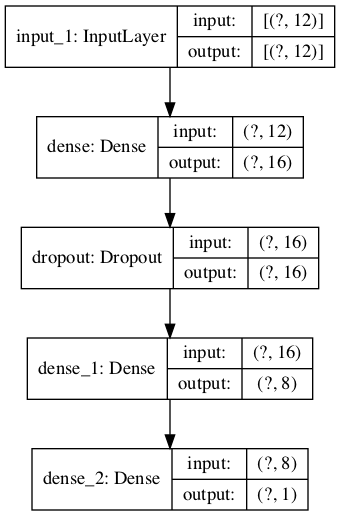

In [25]:
keras.utils.plot_model(model, 'model_classification_shapes.png', show_shapes=True)

In [26]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))
dataset_train = dataset_train.batch(16)

dataset_train.shuffle(128)

<ShuffleDataset shapes: ((None, 12), (None, 1)), types: (tf.float64, tf.int64)>

In [27]:
num_epochs = 10

In [28]:
model.fit(dataset_train, epochs=num_epochs)

Train for 14 steps
Epoch 1/10
14/14 [==============================] - 3s 234ms/step - loss: 0.6207 - accuracy: 0.6368 - precision: 0.3182 - recall: 0.0959
Epoch 2/10
14/14 [==============================] - 0s 5ms/step - loss: 0.6068 - accuracy: 0.6682 - precision: 0.4667 - recall: 0.0959    
Epoch 3/10
14/14 [==============================] - 0s 11ms/step - loss: 0.5848 - accuracy: 0.6771 - precision: 0.5294 - recall: 0.1233  
Epoch 4/10
14/14 [==============================] - 0s 6ms/step - loss: 0.5703 - accuracy: 0.6996 - precision: 0.6500 - recall: 0.1781
Epoch 5/10
14/14 [==============================] - 0s 8ms/step - loss: 0.5744 - accuracy: 0.6682 - precision: 0.4545 - recall: 0.0685
Epoch 6/10
14/14 [==============================] - 0s 12ms/step - loss: 0.5603 - accuracy: 0.6816 - precision: 0.5714 - recall: 0.1096
Epoch 7/10
14/14 [==============================] - 0s 14ms/step - loss: 0.5376 - accuracy: 0.7220 - precision: 0.7895 - recall: 0.2055
Epoch 8/10
14/14 [=======

In [29]:
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))
dataset_val = dataset_val.batch(16)

In [30]:
model = build_and_compile_model()

training_history = model.fit(dataset_train, epochs=num_epochs, validation_data=dataset_val)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Train for 14 steps, validate for 3 steps
Epoch 1/10
14/14 [==============================] - 5s 384ms/step - loss: 1.0510 - acc

### Plotting accuracy and loss

In [31]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])

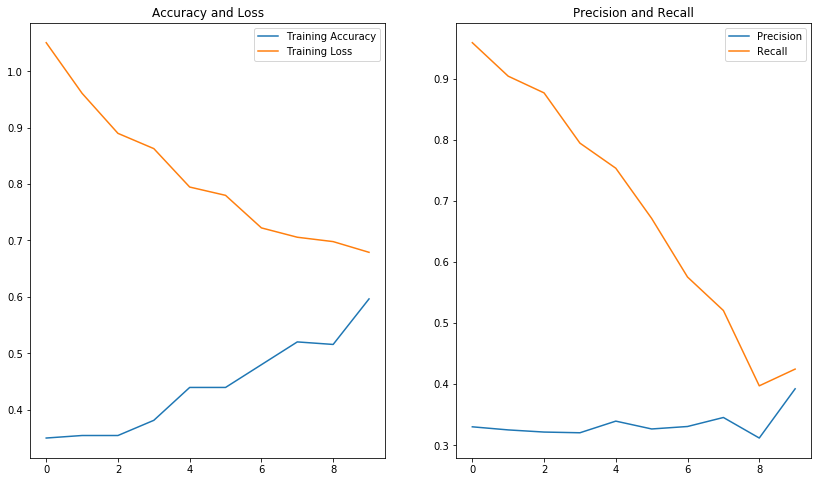

In [32]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['precision_1']
recall = training_history.history['recall_1']

epochs_range = range(num_epochs)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, train_loss, label='Training Loss')

plt.title('Accuracy and Loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, precision, label='Precision')
plt.plot(epochs_range, recall, label='Recall')

plt.title('Precision and Recall')
plt.legend()

### Performing prediction

In [33]:
y_pred = model.predict(x_test)

y_pred[:10]

array([[0.4289192 ],
       [0.29096803],
       [0.4720687 ],
       [0.45426133],
       [0.44349304],
       [0.36768913],
       [0.5437926 ],
       [0.40970764],
       [0.47982445],
       [0.40960303]], dtype=float32)

In [34]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)

In [35]:
y_pred[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [36]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                             'y_pred': y_pred.flatten().astype('int32') }, index = range(len(y_pred)))

In [37]:
pred_results.sample(10)

,y_test,y_pred
26,0,0
13,0,0
8,1,0
20,1,0
29,0,0
46,0,0
10,1,1
18,1,0
38,0,0
19,0,0


In [38]:
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,27,13
1,4,3


In [39]:
accuracy_score(y_test, y_pred)

0.6382978723404256

In [40]:
precision_score(y_test, y_pred)

0.42857142857142855

In [41]:
recall_score(y_test, y_pred)

0.1875

In [42]:
ckpt_path = 'my_models/spine_classfication'
ckpt_dir = os.path.dirname(ckpt_path)

ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                   save_weights_only=True,
                                                   save_freq=3,
                                                   verbose=False)

In [43]:
model = build_and_compile_model()

model.fit(dataset_train, 
          epochs=num_epochs, 
          validation_data=dataset_val,
          verbose=False,
          callbacks=[ckpt_callback])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [44]:
!ls my_models/

checkpoint                              relu_64_weights.h5
relu_64_config.json                     relu_64_weights.index
relu_64_config_weights                  spine_classfication.data-00000-of-00001
relu_64_weights.data-00000-of-00001     spine_classfication.index


In [45]:
y_pred = model.predict(x_test)

y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)

accuracy_score(y_test, y_pred)

0.7446808510638298

In [46]:
reloaded_model = build_and_compile_model()

reloaded_model.load_weights(ckpt_path)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [47]:
y_pred = reloaded_model.predict(x_test)

y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)

accuracy_score(y_test, y_pred)

0.7446808510638298

In [48]:
reloaded_model.fit(dataset_train, 
                   epochs=5, 
                   validation_data=dataset_val)

Train for 14 steps, validate for 3 steps
Epoch 1/5
14/14 [==============================] - 4s 306ms/step - loss: 0.4886 - accuracy: 0.7444 - precision_3: 0.6667 - recall_3: 0.4384 - val_loss: 0.4376 - val_accuracy: 0.7750 - val_precision_3: 0.6667 - val_recall_3: 0.3636
Epoch 2/5
14/14 [==============================] - 0s 8ms/step - loss: 0.4901 - accuracy: 0.7534 - precision_3: 0.7045 - recall_3: 0.4247 - val_loss: 0.4337 - val_accuracy: 0.7500 - val_precision_3: 0.5714 - val_recall_3: 0.3636
Epoch 3/5
14/14 [==============================] - 0s 12ms/step - loss: 0.4842 - accuracy: 0.7758 - precision_3: 0.7170 - recall_3: 0.5205 - val_loss: 0.4281 - val_accuracy: 0.7500 - val_precision_3: 0.5714 - val_recall_3: 0.3636
Epoch 4/5
14/14 [==============================] - 0s 13ms/step - loss: 0.4761 - accuracy: 0.7489 - precision_3: 0.6735 - recall_3: 0.4521 - val_loss: 0.4272 - val_accuracy: 0.7500 - val_precision_3: 0.5714 - val_recall_3: 0.3636
Epoch 5/5
14/14 [======================

In [49]:
y_pred = reloaded_model.predict(x_test)

y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)

accuracy_score(y_test, y_pred)

0.7872340425531915

In [50]:
model = build_and_compile_model()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 16)                208       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [53]:
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [54]:
model.fit(dataset_train, 
          epochs=num_epochs, 
          validation_data=dataset_val,
          verbose=False,
          callbacks=[tensorboard_callback])

In [56]:
%load_ext tensorboard

In [ ]:
## TODO recording: Here within the Jupyter Notebook, just select the various tabs and show
## what is in each tab. Scalars, graphs, distributions, histograms
## Then switch over to the terminal window and run Tensorboard there

In [57]:
%tensorboard --logdir logs/